# Instructions

In order to replicate the plots in the paper, generate the `network_reliability_data.pkl` file by running
``python network_reliability.py``
And generate the `risk_estimation_data.pkl` file by running
``python risk_estimation.py``.

These `.pkl` files contain the runtimes and bounds returned by the different algorithms on the datasets.
You can customize which algorithms are run by editing the following code in `network_reliability.py`

    mw_eps_list = [0.02,0.01,0.005]
    naive_sinkhorn_eta_list = [500]
    do_colgen = True
    do_naive = True
    
or the following code in `risk_estimation.py`

    mw_eps_list = [0.02,0.01]
    naive_sinkhorn_eta_list = [200]
    sinkhorn_eta_list = [200]
    do_colgen = True
    do_naive = True
    
You can customize the problem instances on which the algorithms are run by editing the following lines in `network_reliability.py`

    for v in range(2,6):

        for mode in ['worst_case', 'best_case']:
            ##########################################################################
            ## A) Generate graph test

            if mode =='best_case':
                edge_failure_prob = 0.99
            elif mode == 'worst_case':
                edge_failure_prob = 0.01
            else:
                assert(False)

            # # Path graph
            # input_graph = {(i,i+1) : edge_failure_prob for i in range(v-1)}

            # # Random Graph
            # input_graph = {tuple(x) : edge_failure_prob for x in itertools.combinations(range(v),2) if random.random() < 0.5}

            # Complete graph
            input_graph = {tuple(x) : edge_failure_prob for x in itertools.combinations(range(v),2)}
            

or the following code in `estimation.py`

    for k in [2,3,4,5]:

        n = 10

        # A) Set up problem
        # Dataset where the marginal return distribution on a time step is uniform in [1, 1 + 1/k]
        ratio_dists = []
        for i in range(k):
            ratio_dists.append([])
            for j in range(n):
                ratio_dists[i].append((1 + j/(k*n), 1/n))

In [73]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['font.size'] = 11
plt.rcParams["mathtext.fontset"] = "cm"
plt.rcParams['axes.titlesize'] = 'x-large'
plt.rcParams['axes.labelsize'] = 'x-large'
plt.rcParams['lines.linewidth'] = 2
figsfolder = '/Users/eboix/Dropbox/Jason/MOT/writeup_alg/mathprog/d1_revision/figs/'

# Network reliability plots

In [74]:
# Saved results with edge_failure_prob = 0.01 for worst_case, 0.99 for best_case
run_data = {(2, 'worst_case', 'cg'): (0.99, 0.32831311225891113), (2, 'worst_case', 'mw0.01'): (0.99, 0.0904397964477539), (2, 'worst_case', 'naive'): (0.99, 0.0017919540405273438), (3, 'worst_case', 'cg'): (0.985, 0.0035800933837890625), (3, 'worst_case', 'mw0.01'): (0.99, 0.12365603446960449), (3, 'worst_case', 'naive'): (0.985, 0.005438089370727539), (4, 'worst_case', 'cg'): (0.98, 0.0048487186431884766), (4, 'worst_case', 'mw0.01'): (0.99, 0.1487410068511963), (4, 'worst_case', 'naive'): (0.98, 0.004221916198730469), (5, 'worst_case', 'cg'): (0.975, 0.019611120223999023), (5, 'worst_case', 'mw0.01'): (0.99, 0.17186617851257324), (5, 'worst_case', 'naive'): (0.975, 0.04087018966674805), (6, 'worst_case', 'cg'): (0.97, 0.11754798889160156), (6, 'worst_case', 'mw0.01'): (0.99, 0.19510412216186523), (6, 'worst_case', 'naive'): (0.9700000000000002, 1.766113042831421), (7, 'worst_case', 'cg'): (0.965, 0.5302259922027588), (7, 'worst_case', 'mw0.01'): (0.99, 0.21964001655578613), (7, 'worst_case', 'naive'): (0.9650000000000003, 170.3743031024933), (8, 'worst_case', 'cg'): (0.9600000000000004, 5.299043893814087), (8, 'worst_case', 'mw0.01'): (0.99, 0.25112390518188477), (9, 'worst_case', 'cg'): (0.955, 28.218992233276367), (9, 'worst_case', 'mw0.01'): (0.99, 0.2765839099884033), (10, 'worst_case', 'cg'): (0.9500000000000004, 134.6071319580078), (10, 'worst_case', 'mw0.01'): (0.9839871417969168, 0.4515340328216553), (11, 'worst_case', 'cg'): (0.9450000000000004, 629.2566766738892), (11, 'worst_case', 'mw0.01'): (0.9773215910642828, 0.6937100887298584), (12, 'worst_case', 'mw0.01'): (0.9772890503577959, 0.8318972587585449), (13, 'worst_case', 'mw0.01'): (0.9702161365199296, 1.0108661651611328), (14, 'worst_case', 'mw0.01'): (0.9631244682298886, 1.7128939628601074), (15, 'worst_case', 'mw0.01'): (0.9630838396613114, 1.926056146621704), (16, 'worst_case', 'mw0.01'): (0.9556452259731522, 2.300704002380371), (17, 'worst_case', 'mw0.01'): (0.9557593388450134, 3.008028984069824), (18, 'worst_case', 'mw0.01'): (0.9482807724044405, 4.751907825469971), (19, 'worst_case', 'mw0.01'): (0.9408955273366273, 4.362539768218994), (20, 'worst_case', 'mw0.01'): (0.9334502647105768, 8.184261083602905), (21, 'worst_case', 'mw0.01'): (0.9256422039474347, 8.477193832397461), (22, 'worst_case', 'mw0.01'): (0.9256961205419709, 9.977110147476196), (23, 'worst_case', 'mw0.01'): (0.9180752866618219, 17.388160228729248), (24, 'worst_case', 'mw0.01'): (0.9183857121746924, 21.843726873397827), (25, 'worst_case', 'mw0.01'): (0.9104662898965609, 11.802061796188354), (26, 'worst_case', 'mw0.01'): (0.9025799714829019, 22.985297918319702), (27, 'worst_case', 'mw0.01'): (0.902735613977799, 28.08206582069397), (28, 'worst_case', 'mw0.01'): (0.8946210202496002, 33.91191291809082), (29, 'worst_case', 'mw0.01'): (0.8868259136503627, 47.907634019851685), (30, 'worst_case', 'mw0.01'): (0.8866086474846441, 55.71390509605408), (31, 'worst_case', 'mw0.01'): (0.8787690003456342, 42.04777002334595), (32, 'worst_case', 'mw0.01'): (0.871140775912524, 75.8750228881836), (33, 'worst_case', 'mw0.01'): (0.8714609213536615, 89.12447905540466), (34, 'worst_case', 'mw0.01'): (0.8635174671116926, 102.7361319065094), (35, 'worst_case', 'mw0.01'): (0.8555382850427358, 153.84498596191406), (36, 'worst_case', 'mw0.01'): (0.8558552121829048, 182.83270406723022), (37, 'worst_case', 'mw0.01'): (0.8473876275282131, 77.06797099113464), (38, 'worst_case', 'mw0.01'): (0.8476974394285242, 94.60694813728333), (39, 'worst_case', 'mw0.01'): (0.8317862946929863, 169.93303203582764), (2, 'worst_case', 'mw0.005'): (0.99, 0.627539873123169), (3, 'worst_case', 'mw0.005'): (0.9899217170290878, 0.4587879180908203), (4, 'worst_case', 'mw0.005'): (0.9898663877454619, 0.5159511566162109), (5, 'worst_case', 'mw0.005'): (0.9878478550031558, 0.6182410717010498), (6, 'worst_case', 'mw0.005'): (0.9849943103360224, 0.8119139671325684), (7, 'worst_case', 'mw0.005'): (0.9818251230134042, 0.9170520305633545), (8, 'worst_case', 'mw0.005'): (0.975519215572887, 1.5047011375427246), (9, 'worst_case', 'mw0.005'): (0.9719228293812889, 2.415065050125122), (10, 'worst_case', 'mw0.005'): (0.968257555417516, 2.141869068145752), (11, 'worst_case', 'mw0.005'): (0.9613127609582092, 3.9392168521881104), (12, 'worst_case', 'mw0.005'): (0.9575002034156365, 6.530138969421387), (13, 'worst_case', 'mw0.005'): (0.9536729612872088, 3.577091693878174), (14, 'worst_case', 'mw0.005'): (0.9498237684861256, 7.162118196487427), (15, 'worst_case', 'mw0.005'): (0.9425359194348905, 13.695715188980103), (16, 'worst_case', 'mw0.005'): (0.9386316811425811, 10.444837093353271), (17, 'worst_case', 'mw0.005'): (0.9347278924541159, 18.006296157836914), (18, 'worst_case', 'mw0.005'): (0.9272942190106643, 30.996285915374756), (19, 'worst_case', 'mw0.005'): (0.923357394040624, 17.708465337753296), (20, 'worst_case', 'mw0.005'): (0.9194259029354569, 32.01845717430115), (21, 'worst_case', 'mw0.005'): (0.9157504859797112, 37.07878398895264), (22, 'worst_case', 'mw0.005'): (0.9079445471487111, 43.07141995429993), (23, 'worst_case', 'mw0.005'): (0.9039946460516584, 72.4646053314209), (24, 'worst_case', 'mw0.005'): (0.9000526946514551, 85.72529315948486), (25, 'worst_case', 'mw0.005'): (0.8924414530687039, 35.06098031997681), (26, 'worst_case', 'mw0.005'): (0.8884798828318915, 83.95556306838989), (27, 'worst_case', 'mw0.005'): (0.8845225930813336, 92.522940158844), (28, 'worst_case', 'mw0.005'): (0.8808386113733079, 183.93406009674072), (29, 'worst_case', 'mw0.005'): (0.8729093870421281, 195.16129279136658), (2, 'worst_case', 'mw0.02'): (0.99, 0.19539904594421387), (3, 'worst_case', 'mw0.02'): (0.99, 0.06293487548828125), (4, 'worst_case', 'mw0.02'): (0.99, 0.07649898529052734), (5, 'worst_case', 'mw0.02'): (0.99, 0.08864903450012207), (6, 'worst_case', 'mw0.02'): (0.99, 0.10160589218139648), (7, 'worst_case', 'mw0.02'): (0.99, 0.12518715858459473), (8, 'worst_case', 'mw0.02'): (0.99, 0.1293478012084961), (9, 'worst_case', 'mw0.02'): (0.99, 0.14352893829345703), (10, 'worst_case', 'mw0.02'): (0.99, 0.16006994247436523), (11, 'worst_case', 'mw0.02'): (0.99, 0.1806640625), (12, 'worst_case', 'mw0.02'): (0.99, 0.2099781036376953), (13, 'worst_case', 'mw0.02'): (0.99, 0.2254033088684082), (14, 'worst_case', 'mw0.02'): (0.989607300854484, 0.28037500381469727), (15, 'worst_case', 'mw0.02'): (0.989607300854484, 0.3083021640777588), (16, 'worst_case', 'mw0.02'): (0.989607300854484, 0.3927140235900879), (17, 'worst_case', 'mw0.02'): (0.9896089570129757, 0.458599328994751), (18, 'worst_case', 'mw0.02'): (0.9896089570129757, 0.5197548866271973), (19, 'worst_case', 'mw0.02'): (0.975461125425329, 0.711083173751831), (20, 'worst_case', 'mw0.02'): (0.9755179980147329, 0.894895076751709), (21, 'worst_case', 'mw0.02'): (0.9606104096278236, 1.4119789600372314), (22, 'worst_case', 'mw0.02'): (0.9606572455137756, 1.5152082443237305), (23, 'worst_case', 'mw0.02'): (0.9606567070934793, 1.6774232387542725), (24, 'worst_case', 'mw0.02'): (0.945527742404948, 1.8688852787017822), (25, 'worst_case', 'mw0.02'): (0.9457272806634652, 2.084625720977783), (26, 'worst_case', 'mw0.02'): (0.9300774574771992, 4.47345495223999), (27, 'worst_case', 'mw0.02'): (0.9303227494401075, 5.313427209854126), (28, 'worst_case', 'mw0.02'): (0.9145490831982035, 6.300863981246948), (29, 'worst_case', 'mw0.02'): (0.9146369149432431, 8.310882091522217), (30, 'worst_case', 'mw0.02'): (0.9146101417725587, 9.447694778442383), (31, 'worst_case', 'mw0.02'): (0.8993033819993095, 17.312218189239502), (32, 'worst_case', 'mw0.02'): (0.899329478272056, 20.42208504676819), (33, 'worst_case', 'mw0.02'): (0.8835172352866459, 16.644195079803467), (34, 'worst_case', 'mw0.02'): (0.8833917404808458, 16.0820529460907), (35, 'worst_case', 'mw0.02'): (0.88363052908665, 19.307225227355957), (36, 'worst_case', 'mw0.02'): (0.8676717075473335, 39.4571259021759), (37, 'worst_case', 'mw0.02'): (0.8676217793609322, 40.53036642074585), (38, 'worst_case', 'mw0.02'): (0.8677707806419537, 49.747198820114136), (39, 'worst_case', 'mw0.02'): (0.8681137442107542, 53.56041598320007), (2, 'best_case', 'cg'): (0.99, 0.004294157028198242), (2, 'best_case', 'mw0.02'): (0.99, 0.0435938835144043), (2, 'best_case', 'mw0.01'): (0.99, 0.08817911148071289), (2, 'best_case', 'mw0.005'): (0.99, 0.35957932472229004), (2, 'best_case', 'naive'): (0.99, 0.0007717609405517578), (3, 'best_case', 'cg'): (0.985, 0.0031740665435791016), (3, 'best_case', 'mw0.02'): (0.99, 0.061760902404785156), (3, 'best_case', 'mw0.01'): (0.99, 0.12808895111083984), (3, 'best_case', 'mw0.005'): (0.9899217170290878, 0.45632004737854004), (3, 'best_case', 'naive'): (0.985, 0.0034360885620117188), (4, 'best_case', 'cg'): (0.98, 0.0041348934173583984), (4, 'best_case', 'mw0.02'): (0.99, 0.07466602325439453), (4, 'best_case', 'mw0.01'): (0.99, 0.14864897727966309), (4, 'best_case', 'mw0.005'): (0.9899217938879611, 0.5122277736663818), (4, 'best_case', 'naive'): (0.9799999999999999, 0.0034749507904052734), (5, 'best_case', 'cg'): (0.9750000000000001, 0.011469125747680664), (5, 'best_case', 'mw0.02'): (0.99, 0.08607101440429688), (5, 'best_case', 'mw0.01'): (0.99, 0.17467212677001953), (5, 'best_case', 'mw0.005'): (0.9877951437351418, 0.6186048984527588), (5, 'best_case', 'naive'): (0.9750000000000003, 0.03927302360534668), (6, 'best_case', 'cg'): (0.9700000000000004, 0.028963088989257812), (6, 'best_case', 'mw0.02'): (0.99, 0.09827899932861328), (6, 'best_case', 'mw0.01'): (0.99, 0.19674301147460938), (6, 'best_case', 'mw0.005'): (0.9849943103360225, 0.8031308650970459), (6, 'best_case', 'naive'): (0.97, 1.720952033996582), (7, 'best_case', 'cg'): (0.9649999999999995, 0.059966325759887695), (7, 'best_case', 'mw0.02'): (0.99, 0.1099860668182373), (7, 'best_case', 'mw0.01'): (0.99, 0.22238397598266602), (7, 'best_case', 'mw0.005'): (0.9790097543653343, 1.2292578220367432), (7, 'best_case', 'naive'): (0.965, 180.70152497291565), (8, 'best_case', 'cg'): (0.9600000000000001, 0.14156222343444824), (8, 'best_case', 'mw0.02'): (0.99, 0.13262367248535156), (8, 'best_case', 'mw0.01'): (0.99, 0.25236082077026367), (8, 'best_case', 'mw0.005'): (0.9755192155728875, 1.5487051010131836), (9, 'best_case', 'cg'): (0.9550000000000002, 0.2857799530029297), (9, 'best_case', 'mw0.02'): (0.99, 0.1494462490081787), (9, 'best_case', 'mw0.01'): (0.99, 0.293302059173584), (9, 'best_case', 'mw0.005'): (0.9721206209654745, 2.512089967727661), (10, 'best_case', 'cg'): (0.9500000000000011, 0.6288361549377441), (10, 'best_case', 'mw0.02'): (0.99, 0.16405582427978516), (10, 'best_case', 'mw0.01'): (0.9839871417969168, 0.44810914993286133), (10, 'best_case', 'mw0.005'): (0.9650902501933767, 3.529460906982422), (11, 'best_case', 'cg'): (0.9449999999999973, 0.9581360816955566), (11, 'best_case', 'mw0.02'): (0.99, 0.17914223670959473), (11, 'best_case', 'mw0.01'): (0.9773853306391249, 0.7034859657287598), (11, 'best_case', 'mw0.005'): (0.9614424005901625, 4.245770215988159), (12, 'best_case', 'mw0.02'): (0.99, 0.20393109321594238), (12, 'best_case', 'mw0.01'): (0.9704774553612631, 0.8886370658874512), (12, 'best_case', 'mw0.005'): (0.957552351899257, 7.1232991218566895), (13, 'best_case', 'mw0.02'): (0.99, 0.2203531265258789), (13, 'best_case', 'mw0.01'): (0.9704727771846879, 1.038503885269165), (13, 'best_case', 'mw0.005'): (0.9503825992036787, 7.482381105422974), (14, 'best_case', 'mw0.02'): (0.9896073008544843, 0.2638061046600342), (14, 'best_case', 'mw0.01'): (0.9632516925352707, 1.789376974105835), (14, 'best_case', 'mw0.005'): (0.9465380789491702, 8.45215630531311), (15, 'best_case', 'mw0.02'): (0.9896073008544843, 0.2916851043701172), (15, 'best_case', 'mw0.01'): (0.9633389632679589, 2.016002655029297), (15, 'best_case', 'mw0.005'): (0.9425359194348905, 13.415178775787354), (16, 'best_case', 'mw0.02'): (0.975430885742509, 0.4592411518096924), (16, 'best_case', 'mw0.01'): (0.9559204550591784, 2.388062000274658), (16, 'best_case', 'mw0.005'): (0.9352295139985655, 18.593050003051758), (17, 'best_case', 'mw0.02'): (0.9753673514145769, 0.5617890357971191), (17, 'best_case', 'mw0.01'): (0.9487274041063374, 4.595771789550781), (17, 'best_case', 'mw0.005'): (0.9351642949235381, 20.287764072418213), (18, 'best_case', 'mw0.02'): (0.9755250561347933, 0.5793948173522949), (18, 'best_case', 'mw0.01'): (0.9412162883525628, 4.087914943695068), (18, 'best_case', 'mw0.005'): (0.9275343873729514, 37.18938183784485), (19, 'best_case', 'mw0.02'): (0.9756222263610499, 0.6525261402130127), (19, 'best_case', 'mw0.01'): (0.9336828798313394, 8.877375841140747), (19, 'best_case', 'mw0.005'): (0.9198683405667002, 35.66055107116699), (20, 'best_case', 'mw0.02'): (0.9609337110953705, 1.259092092514038), (20, 'best_case', 'mw0.01'): (0.9337673019457284, 9.222961187362671), (20, 'best_case', 'mw0.005'): (0.9159249929234986, 36.10061979293823), (21, 'best_case', 'mw0.02'): (0.9611536221838818, 1.4468438625335693), (21, 'best_case', 'mw0.01'): (0.9260726794154152, 11.07905101776123), (21, 'best_case', 'mw0.005'): (0.9122506590667787, 70.36021399497986), (22, 'best_case', 'mw0.02'): (0.9611896331296311, 1.6156578063964844), (22, 'best_case', 'mw0.01'): (0.9262337403237135, 13.19231915473938), (22, 'best_case', 'mw0.005'): (0.9081537643125458, 50.21665287017822), (23, 'best_case', 'mw0.02'): (0.9613486262470725, 1.7672569751739502), (23, 'best_case', 'mw0.01'): (0.9185445998293547, 25.48898983001709), (23, 'best_case', 'mw0.005'): (0.9006081763999991, 105.64404892921448), (24, 'best_case', 'mw0.02'): (0.9461908170354304, 2.357923984527588), (24, 'best_case', 'mw0.01'): (0.9106841410604611, 11.707635879516602), (24, 'best_case', 'mw0.005'): (0.8928436704288433, 51.122443199157715), (25, 'best_case', 'mw0.02'): (0.9464790066918017, 2.476701021194458), (25, 'best_case', 'mw0.01'): (0.9029495419094614, 27.495455980300903), (25, 'best_case', 'mw0.005'): (0.8889062530983269, 105.69213199615479), (26, 'best_case', 'mw0.02'): (0.9310564211639403, 5.702277183532715), (26, 'best_case', 'mw0.01'): (0.8951699938719159, 32.610620975494385), (26, 'best_case', 'mw0.005'): (0.884889138612264, 112.99748992919922), (27, 'best_case', 'mw0.02'): (0.9312076386924807, 6.448559284210205), (27, 'best_case', 'mw0.01'): (0.8953226502293731, 40.45257306098938), (27, 'best_case', 'mw0.005'): (0.8809820759342208, 181.58493423461914), (28, 'best_case', 'mw0.02'): (0.91556274936015, 9.23639702796936), (28, 'best_case', 'mw0.01'): (0.8871967701694926, 64.68812322616577), (28, 'best_case', 'mw0.005'): (0.8771653744658737, 171.16812586784363), (29, 'best_case', 'mw0.02'): (0.8997015694864079, 18.250203132629395), (29, 'best_case', 'mw0.01'): (0.8874752005434354, 75.10393977165222), (29, 'best_case', 'mw0.005'): (0.8695401069495223, 328.3083288669586), (12, 'best_case', 'cg'): (0.9400000000000006, 1.9143998622894287), (13, 'best_case', 'cg'): (0.9349999999999982, 3.8014070987701416), (14, 'best_case', 'cg'): (0.9300000000000004, 8.107293844223022), (15, 'best_case', 'cg'): (0.9250000000000002, 16.634601831436157), (16, 'best_case', 'cg'): (0.9199999999999965, 29.968029737472534), (17, 'best_case', 'cg'): (0.9149999999999974, 58.00447916984558), (18, 'best_case', 'cg'): (0.9099999999999985, 124.94270372390747), (19, 'best_case', 'cg'): (0.9050000000000021, 215.01771330833435), (2, 'best_case', 'naive_sinkhorn500'): (0.99, 0.00034308433532714844), (3, 'best_case', 'naive_sinkhorn500'): (0.9850695997660102, 0.005579948425292969), (4, 'best_case', 'naive_sinkhorn500'): (0.9812113050150274, 0.021799802780151367), (5, 'best_case', 'naive_sinkhorn500'): (0.9768503858452062, 0.0890970230102539), (6, 'best_case', 'naive_sinkhorn500'): (0.9742231511510174, 0.9916102886199951), (3, 'worst_case', 'naive_sinkhorn500'): (0.9850695997660661, 0.0057108402252197266), (4, 'worst_case', 'naive_sinkhorn500'): (0.9819895769773064, 0.022968053817749023), (5, 'worst_case', 'naive_sinkhorn500'): (0.9777376475030766, 0.16019797325134277), (6, 'worst_case', 'naive_sinkhorn500'): (0.9707826025634957, 1.443688154220581), (7, 'worst_case', 'naive_sinkhorn500'): (0.9719969969804834, 91.74867081642151), (7, 'best_case', 'naive_sinkhorn500'): (0.9703261989247922, 83.11300706863403), (3, 'worst_case', 'naive_sinkhorn250'): (0.9850474793314569, 0.003548145294189453), (3, 'best_case', 'naive_sinkhorn250'): (0.9850474793314571, 0.0034499168395996094), (4, 'worst_case', 'naive_sinkhorn250'): (0.9820784281001561, 0.014860153198242188), (4, 'best_case', 'naive_sinkhorn250'): (0.981189180638021, 0.0135040283203125), (5, 'worst_case', 'naive_sinkhorn250'): (0.9756246066031382, 0.09474897384643555), (5, 'best_case', 'naive_sinkhorn250'): (0.9769260054567632, 0.06314492225646973), (6, 'worst_case', 'naive_sinkhorn250'): (0.9702914918618808, 1.021007776260376), (6, 'best_case', 'naive_sinkhorn250'): (0.9742842539454857, 0.8835701942443848), (7, 'worst_case', 'naive_sinkhorn250'): (0.9714268064552807, 71.30083394050598), (7, 'best_case', 'naive_sinkhorn250'): (0.9739050803869189, 67.22028303146362)}
pickle.dump(run_data, open('network_reliability_data.pkl', 'wb'))
run_data = pickle.load(open('network_reliability_data.pkl', 'rb'))

In [75]:
def get_method_indices_scores_times_net_rel(method, mode='worst_case'):
    method_idx = [(i, mode, method) for i in range(2,30)]
    method_idx = [x for x in method_idx if x in run_data and run_data[x][1] < 120] # 2-minute cutoff
    method_indices = [x[0] for x in method_idx]
    method_scores = [run_data[x][0] for x in method_idx]
    method_times = [run_data[x][1] for x in method_idx]
    return np.asarray(method_indices), np.asarray(method_scores), method_times


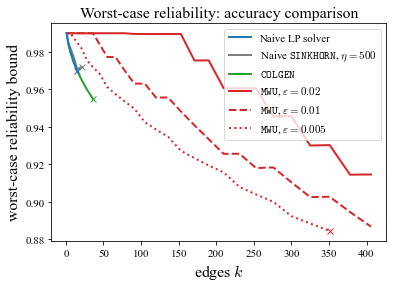

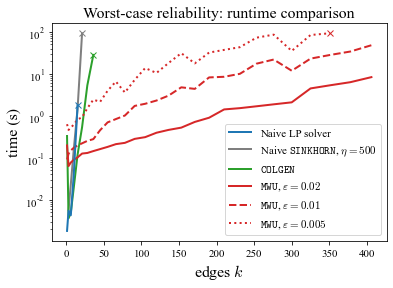

In [76]:
naive_indices, naive_scores, naive_times = get_method_indices_scores_times_net_rel('naive')
naive_sinkhorn_indices, naive_sinkhorn_scores, naive_sinkhorn_times = get_method_indices_scores_times_net_rel('naive_sinkhorn500')
cg_indices, cg_scores, cg_times = get_method_indices_scores_times_net_rel('cg')
mw02_indices, mw02_scores, mw02_times = get_method_indices_scores_times_net_rel('mw0.02')
mw01_indices, mw01_scores, mw01_times = get_method_indices_scores_times_net_rel('mw0.01')
mw005_indices, mw005_scores, mw005_times = get_method_indices_scores_times_net_rel('mw0.005')

# Value plot
plt.plot(naive_indices * (naive_indices - 1) / 2, naive_scores, color='tab:blue', label='Naive LP solver',zorder=10)
plt.plot(naive_sinkhorn_indices * (naive_sinkhorn_indices - 1) / 2, naive_sinkhorn_scores, color='tab:gray', label=r'Naive $\mathtt{SINKHORN}$, $\eta = 500$')
plt.plot(cg_indices * (cg_indices - 1) / 2, cg_scores, 'g-', color='tab:green', label=r'$\mathtt{COLGEN}$')
plt.plot(mw02_indices * (mw02_indices - 1) / 2, mw02_scores, color='tab:red', label=r'$\mathtt{MWU}$, $\varepsilon = 0.02$')
plt.plot(mw01_indices * (mw01_indices - 1) / 2, mw01_scores, color='tab:red',linestyle='dashed', label=r'$\mathtt{MWU}$, $\varepsilon = 0.01$')
plt.plot(mw005_indices * (mw005_indices - 1) / 2, mw005_scores, color='tab:red',linestyle='dotted', label=r'$\mathtt{MWU}$, $\varepsilon = 0.005$')

plt.plot(naive_indices[-1] * (naive_indices[-1] - 1) / 2,naive_scores[-1],color='tab:blue',label='_nolegend_',marker='x')
plt.plot(naive_sinkhorn_indices[-1] * (naive_sinkhorn_indices[-1] - 1) / 2,naive_sinkhorn_scores[-1],color='tab:gray',label='_nolegend_',marker='x')
plt.plot(cg_indices[-1] * (cg_indices[-1] - 1) / 2,cg_scores[-1],color='tab:green',label='_nolegend_',marker='x')
plt.plot(mw005_indices[-1] * (mw005_indices[-1] - 1) / 2,mw005_scores[-1],color='tab:red',label='_nolegend_',marker='x')
plt.legend()
plt.title('Worst-case reliability: accuracy comparison')
plt.xlabel(r'edges $k$')
plt.ylabel('worst-case reliability bound')
plt.savefig(figsfolder + 'rel/worst_case_accuracy.pdf', format='pdf')
plt.show()

# Scalability plot
plt.plot(naive_indices * (naive_indices - 1) / 2, naive_times, color='tab:blue', label='Naive LP solver',zorder=10)
plt.plot(naive_sinkhorn_indices * (naive_sinkhorn_indices - 1) / 2, naive_sinkhorn_times, color='tab:gray', label=r'Naive $\mathtt{SINKHORN}$, $\eta = 500$')
plt.plot(cg_indices * (cg_indices - 1) / 2, cg_times, color='tab:green', label=r'$\mathtt{COLGEN}$')
plt.plot(mw02_indices * (mw02_indices - 1) / 2, mw02_times, color='tab:red', label=r'$\mathtt{MWU}$, $\varepsilon = 0.02$')
plt.plot(mw01_indices * (mw01_indices - 1) / 2, mw01_times, color='tab:red',linestyle='dashed', label=r'$\mathtt{MWU}$, $\varepsilon = 0.01$')
plt.plot(mw005_indices * (mw005_indices - 1) / 2, mw005_times, color='tab:red',linestyle='dotted', label=r'$\mathtt{MWU}$, $\varepsilon = 0.005$')

plt.plot(naive_indices[-1] * (naive_indices[-1] - 1) / 2,naive_times[-1],color='tab:blue',label='_nolegend_',marker='x')
plt.plot(naive_sinkhorn_indices[-1] * (naive_sinkhorn_indices[-1] - 1) / 2,naive_sinkhorn_times[-1],color='tab:gray',label='_nolegend_',marker='x')
plt.plot(cg_indices[-1] * (cg_indices[-1] - 1) / 2,cg_times[-1],color='tab:green',label='_nolegend_',marker='x')
plt.plot(mw005_indices[-1] * (mw005_indices[-1] - 1) / 2,mw005_times[-1],color='tab:red',label='_nolegend_',marker='x')
plt.yscale('log')
plt.legend()
plt.title('Worst-case reliability: runtime comparison')
plt.xlabel(r'edges $k$')
plt.ylabel('time (s)')
plt.savefig(figsfolder + 'rel/worst_case_runtime.pdf', format='pdf')
plt.show()

# Failure probability of an edge for worst-case reliability is 0.01.

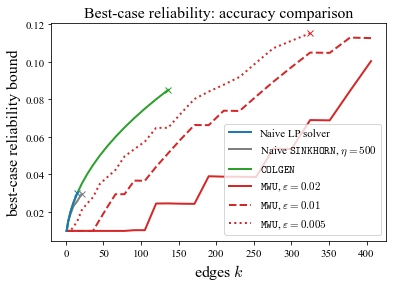

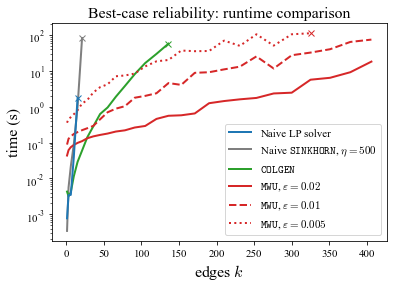

In [77]:
naive_indices, naive_scores, naive_times = get_method_indices_scores_times_net_rel('naive',mode='best_case')
naive_sinkhorn_indices, naive_sinkhorn_scores, naive_sinkhorn_times = get_method_indices_scores_times_net_rel('naive_sinkhorn500',mode='best_case')
cg_indices, cg_scores, cg_times = get_method_indices_scores_times_net_rel('cg','best_case')
mw02_indices, mw02_scores, mw02_times = get_method_indices_scores_times_net_rel('mw0.02','best_case')
mw01_indices, mw01_scores, mw01_times = get_method_indices_scores_times_net_rel('mw0.01','best_case')
mw005_indices, mw005_scores, mw005_times = get_method_indices_scores_times_net_rel('mw0.005','best_case')

# Value plot
plt.plot(naive_indices * (naive_indices - 1) / 2, 1 - naive_scores, color='tab:blue', label='Naive LP solver',zorder=10)
plt.plot(naive_sinkhorn_indices * (naive_sinkhorn_indices - 1) / 2, 1 - naive_sinkhorn_scores, color='tab:gray', label=r'Naive $\mathtt{SINKHORN}$, $\eta = 500$')
plt.plot(cg_indices * (cg_indices - 1) / 2, 1 - cg_scores, color='tab:green', label=r'$\mathtt{COLGEN}$')
plt.plot(mw02_indices * (mw02_indices - 1) / 2, 1 - mw02_scores, color='tab:red', linestyle='solid', label=r'$\mathtt{MWU}$, $\varepsilon = 0.02$')
plt.plot(mw01_indices * (mw01_indices - 1) / 2, 1 - mw01_scores, color='tab:red', linestyle='dashed', label=r'$\mathtt{MWU}$, $\varepsilon = 0.01$')
plt.plot(mw005_indices * (mw005_indices - 1) / 2, 1 - mw005_scores, color='tab:red', linestyle='dotted', label=r'$\mathtt{MWU}$, $\varepsilon = 0.005$')

plt.plot(naive_indices[-1] * (naive_indices[-1] - 1) / 2,1-naive_scores[-1],color='tab:blue',label='_nolegend_',marker='x')
plt.plot(naive_sinkhorn_indices[-1] * (naive_sinkhorn_indices[-1] - 1) / 2,1-naive_sinkhorn_scores[-1],color='tab:gray',label='_nolegend_',marker='x')
plt.plot(cg_indices[-1] * (cg_indices[-1] - 1) / 2,1-cg_scores[-1],color='tab:green',label='_nolegend_',marker='x')
plt.plot(mw005_indices[-1] * (mw005_indices[-1] - 1) / 2,1-mw005_scores[-1],color='tab:red',label='_nolegend_',marker='x')
plt.legend()
plt.title('Best-case reliability: accuracy comparison')
plt.xlabel(r'edges $k$')
plt.ylabel('best-case reliability bound')
plt.savefig(figsfolder + 'rel/best_case_accuracy.pdf', format='pdf')
plt.show()

# Scalability plot
plt.plot(naive_indices * (naive_indices - 1) / 2, naive_times, color='tab:blue', label='Naive LP solver',zorder=10)
plt.plot(naive_sinkhorn_indices * (naive_sinkhorn_indices - 1) / 2, naive_sinkhorn_times, color='tab:gray', label=r'Naive $\mathtt{SINKHORN}$, $\eta = 500$')
plt.plot(cg_indices * (cg_indices - 1) / 2, cg_times, color='tab:green', label=r'$\mathtt{COLGEN}$')
plt.plot(mw02_indices * (mw02_indices - 1) / 2, mw02_times, color='tab:red', linestyle='solid', label=r'$\mathtt{MWU}$, $\varepsilon = 0.02$')
plt.plot(mw01_indices * (mw01_indices - 1) / 2, mw01_times, color='tab:red', linestyle='dashed', label=r'$\mathtt{MWU}$, $\varepsilon = 0.01$')
plt.plot(mw005_indices * (mw005_indices - 1) / 2, mw005_times, color='tab:red', linestyle='dotted', label=r'$\mathtt{MWU}$, $\varepsilon = 0.005$')

plt.plot(naive_indices[-1] * (naive_indices[-1] - 1) / 2,naive_times[-1],color='tab:blue',label='_nolegend_',marker='x')
plt.plot(naive_sinkhorn_indices[-1] * (naive_sinkhorn_indices[-1] - 1) / 2,naive_sinkhorn_times[-1],color='tab:gray',label='_nolegend_',marker='x')
plt.plot(cg_indices[-1] * (cg_indices[-1] - 1) / 2,cg_times[-1],color='tab:green',label='_nolegend_',marker='x')
plt.plot(mw005_indices[-1] * (mw005_indices[-1] - 1) / 2,mw005_times[-1],color='tab:red',label='_nolegend_',marker='x')
plt.yscale('log')
plt.legend()
plt.title('Best-case reliability: runtime comparison')
plt.xlabel(r'edges $k$')
plt.ylabel('time (s)')
plt.savefig(figsfolder + 'rel/best_case_runtime.pdf', format='pdf')
plt.show()

# Failure probability of an edge for best-case reliability is 0.99.

# Risk estimation plots

In [78]:
# Distribution is uniform in [1, 1 + 1/k]
run_data = {(10, 50, 'sinkhorn2000'): (1.5584876855184826, 2.9492347240448, (1.5447735918898722, 1.572201779147093)), (10, 2, 'sinkhorn2000'): (1.49725, 0.007899999618530273, (1.4466821227660134, 1.5478178772339866)), (10, 3, 'sinkhorn2000'): (1.5390800000000002, 0.012151718139648438, (1.4940061206853235, 1.584153879314677)), (10, 4, 'sinkhorn2000'): (1.5305205156250004, 0.020586013793945312, (1.4937767900152388, 1.567264241234762)), (10, 5, 'sinkhorn2000'): (1.5219931274560006, 0.03161501884460449, (1.487696151952296, 1.5562901029597052)), (10, 6, 'sinkhorn2000'): (1.5599522144757376, 0.04485011100769043, (1.5279423742532674, 1.5919620546982078)), (10, 7, 'sinkhorn2000'): (1.5356140269993466, 0.06084418296813965, (1.5028274758216191, 1.568400578177074)), (10, 8, 'sinkhorn2000'): (1.5447519382591324, 0.07920503616333008, (1.516089921438499, 1.5734139550797657)), (10, 9, 'sinkhorn2000'): (1.5671684619249848, 0.09887504577636719, (1.541644935650389, 1.5926919881995807)), (10, 10, 'sinkhorn2000'): (1.5497952997107576, 0.11963295936584473, (1.5231618786904462, 1.576428720731069)), (10, 20, 'sinkhorn2000'): (1.5613751595110197, 0.47904419898986816, (1.5432533611785997, 1.5794969578434397)), (10, 30, 'sinkhorn2000'): (1.5673878079747976, 1.070836067199707, (1.5508635278430334, 1.5839120881065618)), (10, 40, 'sinkhorn2000'): (1.5576022549472457, 1.9036808013916016, (1.5441541707288897, 1.5710503391656017)), (10, 3, 'naive_sinkhorn100'): (1.5093344097516959, 0.008873939514160156), (10, 4, 'naive_sinkhorn100'): (1.5229858361128394, 0.06645798683166504), (10, 5, 'naive_sinkhorn100'): (1.5316795780091055, 0.6535639762878418), (10, 6, 'naive_sinkhorn100'): (1.5375838975821974, 6.957903861999512), (10, 3, 'naive'): (1.5051259259259264, 0.05587196350097656), (10, 4, 'naive'): (1.5190358984374994, 0.2567138671875), (10, 5, 'naive'): (1.5279660352106668, 2.8736157417297363), (10, 6, 'naive'): (1.534131359855082, 37.75198006629944), (10, 3, 'cg'): (1.5122467457749014, 0.11992287635803223), (10, 4, 'cg'): (1.5265872058795882, 0.23234772682189941), (10, 5, 'cg'): (1.5327242351364065, 0.47284412384033203), (10, 6, 'cg'): (1.5391106363459577, 0.8802061080932617), (10, 7, 'cg'): (1.5442186704561671, 1.2888622283935547), (10, 8, 'cg'): (1.5460381666656857, 1.9888758659362793), (10, 9, 'cg'): (1.5489048121719255, 2.655419111251831), (10, 10, 'cg'): (1.5521090381706315, 3.924889087677002), (10, 11, 'cg'): (1.553694741160533, 4.886582136154175), (10, 12, 'cg'): (1.5542958472328914, 7.130602836608887), (10, 13, 'cg'): (1.5549331039349705, 9.5448477268219), (10, 14, 'cg'): (1.5557377235632364, 11.040699005126953), (10, 15, 'cg'): (1.5569182700715645, 14.213804721832275), (10, 16, 'cg'): (1.5573015911330692, 16.61254596710205), (10, 17, 'cg'): (1.5583593924299655, 19.77001714706421), (10, 18, 'cg'): (1.5593731858496203, 29.132006883621216), (10, 19, 'cg'): (1.5594946570783528, 27.98772883415222), (10, 20, 'mw0.02'): (1.6195241725959582, 34.5322380065918), (10, 10, 'mw0.01'): (1.587956355217612, 38.52873086929321), (10, 2, 'mw0.01'): (1.5125572437766313, 7.853978157043457), (10, 4, 'mw0.01'): (1.5614952455154247, 22.000375986099243), (10, 6, 'mw0.01'): (1.5714124926274964, 24.267441272735596), (10, 8, 'mw0.01'): (1.581604353426043, 41.757179737091064), (10, 2, 'mw0.02'): (1.52125, 2.0929012298583984), (10, 4, 'mw0.02'): (1.5701301953125, 2.2220571041107178), (10, 6, 'mw0.02'): (1.589369979005916, 4.652072906494141), (10, 8, 'mw0.02'): (1.5996735740530095, 7.067428827285767), (10, 10, 'mw0.02'): (1.60609595621432, 11.27637767791748), (10, 12, 'mw0.02'): (1.6104831845043992, 12.669737339019775), (10, 14, 'mw0.02'): (1.6136705263561342, 21.189005136489868), (10, 16, 'mw0.02'): (1.6160910954854937, 25.51173210144043), (10, 18, 'mw0.02'): (1.6179919134500615, 28.173084020614624), (10, 2, 'sinkhorn200'): (1.5020175, 0.007904052734375, (1.4865705116148433, 1.5174644883851567)), (10, 3, 'sinkhorn200'): (1.5220518148148148, 0.01193094253540039, (1.5085769073295803, 1.5355267223000493)), (10, 4, 'sinkhorn200'): (1.5397809773437503, 0.022073984146118164, (1.5280636382020538, 1.5514983164854468)), (10, 5, 'sinkhorn200'): (1.5310222361216002, 0.03210926055908203, (1.5200541730038015, 1.5419902992393988)), (10, 6, 'sinkhorn200'): (1.5387870272176356, 0.04534029960632324, (1.5285933556467735, 1.5489806987884978)), (10, 7, 'sinkhorn200'): (1.538871808182399, 0.06122612953186035, (1.5292674784820164, 1.5484761378827818)), (10, 8, 'sinkhorn200'): (1.5480517317091453, 0.0788888931274414, (1.5391342267856474, 1.5569692366326433)), (10, 9, 'sinkhorn200'): (1.5474402034742643, 0.10169410705566406, (1.5387494575540315, 1.556130949394497)), (10, 2, 'sinkhorn200'): (1.4996487199968935, 0.00786590576171875), (10, 3, 'sinkhorn200'): (1.5202205240470381, 0.011693000793457031), (10, 4, 'sinkhorn200'): (1.5313458563761198, 0.020745038986206055), (10, 5, 'sinkhorn200'): (1.5383025880049426, 0.03121018409729004), (10, 6, 'sinkhorn200'): (1.543061032482905, 0.04441976547241211), (10, 7, 'sinkhorn200'): (1.5465189451134498, 0.060092926025390625), (10, 8, 'sinkhorn200'): (1.54914518481835, 0.0771338939666748), (10, 9, 'sinkhorn200'): (1.5512069936286415, 0.09866595268249512), (10, 10, 'sinkhorn200'): (1.5528686990311145, 0.11998414993286133), (10, 11, 'sinkhorn200'): (1.554236425292719, 0.1451261043548584), (10, 12, 'sinkhorn200'): (1.5553817188137167, 0.173353910446167), (10, 14, 'sinkhorn200'): (1.5571916778473873, 0.2378842830657959), (10, 16, 'sinkhorn200'): (1.5585573121068201, 0.30793309211730957), (10, 18, 'sinkhorn200'): (1.559624331756084, 0.3845338821411133), (10, 20, 'sinkhorn200'): (1.5604809841908818, 0.4729499816894531), (10, 25, 'sinkhorn200'): (1.5620297805676677, 0.7292568683624268), (10, 30, 'sinkhorn200'): (1.5630671744101532, 1.0709261894226074), (10, 40, 'sinkhorn200'): (1.5643693753633758, 1.912294864654541), (10, 50, 'sinkhorn200'): (1.5651536006117572, 3.006121873855591), (10, 2, 'naive_sinkhorn200'): (1.4823352161976535, 0.004128217697143555), (10, 3, 'naive_sinkhorn200'): (1.507557367625222, 0.0114288330078125), (10, 4, 'naive_sinkhorn200'): (1.5214321331698522, 0.07100200653076172), (10, 5, 'naive_sinkhorn200'): (1.5301927598502552, 0.6867740154266357), (10, 6, 'naive_sinkhorn200'): (1.536338175898319, 7.494948863983154),(10, 2, 'naive'): (1.4800000000000002, 0.03467965126037598), (10, 2, 'cg'): (1.48775, 0.05417919158935547), (10, 7, 'naive_sinkhorn200'): (1.5407966461157863, 80.35476994514465), (10, 25, 'mw0.02'): (1.622308638827672, 80.21850275993347), (10, 22, 'mw0.02'): (1.6207856019622582, 51.90710997581482), (10, 24, 'mw0.02'): (1.621842181332227, 45.436503887176514), (10, 26, 'mw0.02'): (1.622740066643455, 96.26543498039246), (10, 28, 'mw0.02'): (1.623512515455153, 64.65029191970825), (10, 30, 'mw0.02'): (1.6241840985683427, 102.33391380310059), (10, 25, 'cg'): (1.5620312227236062, 68.06467294692993), (10, 30, 'cg'): (1.563395155923153, 132.20710110664368), (10, 21, 'cg'): (1.5607229030840466, 36.35122895240784), (10, 23, 'cg'): (1.5614901347494152, 52.08078908920288), (10, 27, 'cg'): (1.5625747160004342, 84.03697514533997), (10, 12, 'mw0.01'): (1.5923013105724038, 47.82895278930664), (10, 14, 'mw0.01'): (1.5954630667547538, 73.38737511634827), (10, 16, 'mw0.01'): (1.597861122755047, 89.00324392318726), (10, 18, 'mw0.01'): (1.5899286290985768, 96.11614084243774), (10, 14, 'mw0.01'): (1.5954630667547538, 73.38737511634827), (10, 16, 'mw0.01'): (1.597861122755047, 89.00324392318726), (10, 18, 'mw0.01'): (1.5899286290985768, 96.11614084243774), (10, 20, 'mw0.01'): (1.6012650541952322, 126.57605409622192)}
pickle.dump(run_data, open('risk_estimation_data.pkl', 'wb'))
run_data = pickle.load(open('risk_estimation_data.pkl', 'rb'))

In [79]:
def get_method_indices_scores_times_risk_est(method, n):
    method_idx = [(n,k, method) for k in range(2,40)]
    method_idx = [x for x in method_idx if x in run_data and run_data[x][1] < 120] # 2-minute cutoff
    method_indices = [x[1] for x in method_idx]
    method_scores = [run_data[x][0] for x in method_idx]
    method_times = [run_data[x][1] for x in method_idx]
    method_conf_intervals = None
    if len(method_idx) > 0 and len(run_data[method_idx[0]]) == 3:
        method_conf_intervals = [run_data[x][2] for x in method_idx]     
    return np.asarray(method_indices), np.asarray(method_scores), method_times, method_conf_intervals


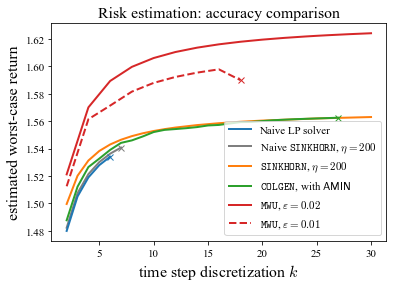

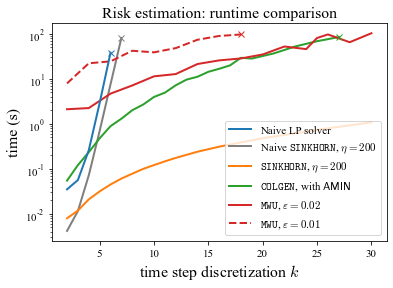

In [80]:
naive_indices, naive_scores, naive_times, _ = get_method_indices_scores_times_risk_est('naive',n=10)
naive_sinkhorn_indices, naive_sinkhorn_scores, naive_sinkhorn_times, _ = get_method_indices_scores_times_risk_est('naive_sinkhorn200',n=10)
sinkhorn_indices, sinkhorn_scores, sinkhorn_times, sinkhorn_conf_intervals = get_method_indices_scores_times_risk_est('sinkhorn200',n=10)
cg_indices, cg_scores, cg_times, _ = get_method_indices_scores_times_risk_est('cg',n=10)
mw02_indices, mw02_scores, mw02_times, _ = get_method_indices_scores_times_risk_est('mw0.02',n=10)
mw01_indices, mw01_scores, mw01_times, _ = get_method_indices_scores_times_risk_est('mw0.01',n=10)
mw005_indices, mw005_scores, mw005_times, _ = get_method_indices_scores_times_risk_est('mw0.005',n=10)

# Value plot
plt.plot(naive_indices, naive_scores, color='tab:blue', label='Naive LP solver',zorder=10)
plt.plot(naive_sinkhorn_indices, naive_sinkhorn_scores, color='tab:gray', label=r'Naive $\mathtt{SINKHORN}$, $\eta = 200$')
plt.plot(sinkhorn_indices, sinkhorn_scores, color='tab:orange', label=r'$\mathtt{SINKHORN}$, $\eta = 200$')
plt.plot(cg_indices, cg_scores, color='tab:green', label=r'$\mathtt{COLGEN}$, with $\mathsf{AMIN}$')
plt.plot(mw02_indices, mw02_scores, color='tab:red', linestyle='solid', label=r'$\mathtt{MWU}$, $\varepsilon = 0.02$')
plt.plot(mw01_indices, mw01_scores, color='tab:red', linestyle='dashed', label=r'$\mathtt{MWU}$, $\varepsilon = 0.01$')
plt.plot(naive_indices[-1],naive_scores[-1],color='tab:blue',label='_nolegend_',marker='x')
plt.plot(naive_sinkhorn_indices[-1],naive_sinkhorn_scores[-1],color='tab:gray',label='_nolegend_',marker='x')
plt.plot(cg_indices[-1],cg_scores[-1],color='tab:green',label='_nolegend_',marker='x')
plt.plot(mw01_indices[-1],mw01_scores[-1],color='tab:red',label='_nolegend_',marker='x')
plt.legend()
plt.title('Risk estimation: accuracy comparison')
plt.xlabel(r'time step discretization $k$')
plt.ylabel('estimated worst-case return')
plt.savefig(figsfolder + 'lr/accuracy.pdf', format='pdf')
plt.show()

# Scalability plot
plt.plot(naive_indices, naive_times, color='tab:blue', label='Naive LP solver',zorder=10)
plt.plot(naive_sinkhorn_indices, naive_sinkhorn_times, color='tab:gray', label=r'Naive $\mathtt{SINKHORN}$, $\eta = 200$')
plt.plot(sinkhorn_indices, sinkhorn_times, color='tab:orange', label=r'$\mathtt{SINKHORN}$, $\eta = 200$')
plt.plot(cg_indices, cg_times, color='tab:green', label=r'$\mathtt{COLGEN}$, with $\mathsf{AMIN}$')
plt.plot(mw02_indices, mw02_times, color='tab:red', linestyle='solid', label=r'$\mathtt{MWU}$, $\varepsilon = 0.02$')
plt.plot(mw01_indices, mw01_times, color='tab:red', linestyle='dashed', label=r'$\mathtt{MWU}$, $\varepsilon = 0.01$')

plt.plot(naive_indices[-1],naive_times[-1],color='tab:blue',label='_nolegend_',marker='x')
plt.plot(naive_sinkhorn_indices[-1],naive_sinkhorn_times[-1],color='tab:gray',label='_nolegend_',marker='x')
plt.plot(cg_indices[-1],cg_times[-1],color='tab:green',label='_nolegend_',marker='x')
plt.plot(mw01_indices[-1],mw01_times[-1],color='tab:red',label='_nolegend_',marker='x')
plt.yscale('log')
plt.legend()
plt.title('Risk estimation: runtime comparison')
plt.xlabel(r'time step discretization $k$')
plt.ylabel('time (s)')
plt.savefig(figsfolder + 'lr/runtime.pdf', format='pdf')
plt.show()

# Failure probability of an edge for best-case reliability is 0.99.